<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#参考資料" data-toc-modified-id="参考資料-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>参考資料</a></span></li><li><span><a href="#Anacondaの設定" data-toc-modified-id="Anacondaの設定-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Anacondaの設定</a></span><ul class="toc-item"><li><span><a href="#バージョンアップ" data-toc-modified-id="バージョンアップ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>バージョンアップ</a></span></li><li><span><a href="#アンインストール" data-toc-modified-id="アンインストール-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>アンインストール</a></span></li><li><span><a href="#追加インストール時の注意" data-toc-modified-id="追加インストール時の注意-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>追加インストール時の注意</a></span></li></ul></li><li><span><a href="#Markdownの例" data-toc-modified-id="Markdownの例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Markdownの例</a></span></li><li><span><a href="#hedding" data-toc-modified-id="hedding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>hedding</a></span><ul class="toc-item"><li><span><a href="#hedding" data-toc-modified-id="hedding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>hedding</a></span><ul class="toc-item"><li><span><a href="#hedding" data-toc-modified-id="hedding-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>hedding</a></span></li></ul></li><li><span><a href="#abcd" data-toc-modified-id="abcd-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>abcd</a></span><ul class="toc-item"><li><span><a href="#abcd" data-toc-modified-id="abcd-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>abcd</a></span></li><li><span><a href="#参考URL" data-toc-modified-id="参考URL-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>参考URL</a></span></li></ul></li></ul></li><li><span><a href="#Jupyter-notebookの使い方" data-toc-modified-id="Jupyter-notebookの使い方-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Jupyter notebookの使い方</a></span><ul class="toc-item"><li><span><a href="#Jupyter-設定" data-toc-modified-id="Jupyter-設定-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Jupyter 設定</a></span></li><li><span><a href="#notebook-のimport" data-toc-modified-id="notebook-のimport-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>notebook のimport</a></span></li><li><span><a href="#ショートカット" data-toc-modified-id="ショートカット-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ショートカット</a></span></li></ul></li><li><span><a href="#関数の引数は値渡し？参照渡し？" data-toc-modified-id="関数の引数は値渡し？参照渡し？-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>関数の引数は値渡し？参照渡し？</a></span><ul class="toc-item"><li><span><a href="#インスタンス変数もMutable/Imutableの注意が必要" data-toc-modified-id="インスタンス変数もMutable/Imutableの注意が必要-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>インスタンス変数もMutable/Imutableの注意が必要</a></span><ul class="toc-item"><li><span><a href="#配列をコピーする場合はcopyメソッドを使わないと同一インスタンスのままになる" data-toc-modified-id="配列をコピーする場合はcopyメソッドを使わないと同一インスタンスのままになる-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>配列をコピーする場合はcopyメソッドを使わないと同一インスタンスのままになる</a></span></li></ul></li></ul></li><li><span><a href="#書式" data-toc-modified-id="書式-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>書式</a></span></li><li><span><a href="#プロットのサンプル" data-toc-modified-id="プロットのサンプル-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>プロットのサンプル</a></span><ul class="toc-item"><li><span><a href="#logスケールで表示が空になる場合" data-toc-modified-id="logスケールで表示が空になる場合-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>logスケールで表示が空になる場合</a></span></li><li><span><a href="#目盛は難しい" data-toc-modified-id="目盛は難しい-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>目盛は難しい</a></span></li><li><span><a href="#対数表示はもっと難しい" data-toc-modified-id="対数表示はもっと難しい-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>対数表示はもっと難しい</a></span><ul class="toc-item"><li><span><a href="#サンプルデータ作成" data-toc-modified-id="サンプルデータ作成-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>サンプルデータ作成</a></span></li><li><span><a href="#対数表示を試みる" data-toc-modified-id="対数表示を試みる-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>対数表示を試みる</a></span></li><li><span><a href="#余談：Analog/Digitalフィルタの違い" data-toc-modified-id="余談：Analog/Digitalフィルタの違い-8.3.3"><span class="toc-item-num">8.3.3&nbsp;&nbsp;</span>余談：Analog/Digitalフィルタの違い</a></span></li></ul></li><li><span><a href="#Artist" data-toc-modified-id="Artist-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Artist</a></span></li></ul></li><li><span><a href="#Pandasのサンプル" data-toc-modified-id="Pandasのサンプル-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Pandasのサンプル</a></span></li><li><span><a href="#ボタン等のつけ方" data-toc-modified-id="ボタン等のつけ方-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ボタン等のつけ方</a></span></li><li><span><a href="#Waveファイルの扱い" data-toc-modified-id="Waveファイルの扱い-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Waveファイルの扱い</a></span></li><li><span><a href="#連立方程式を解く" data-toc-modified-id="連立方程式を解く-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>連立方程式を解く</a></span></li><li><span><a href="#改行なしで文字列を出力したい" data-toc-modified-id="改行なしで文字列を出力したい-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>改行なしで文字列を出力したい</a></span></li><li><span><a href="#global変数" data-toc-modified-id="global変数-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>global変数</a></span></li><li><span><a href="#Numpy配列" data-toc-modified-id="Numpy配列-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Numpy配列</a></span><ul class="toc-item"><li><span><a href="#配列の基本" data-toc-modified-id="配列の基本-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>配列の基本</a></span></li><li><span><a href="#行列全体のTrue/False" data-toc-modified-id="行列全体のTrue/False-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>行列全体のTrue/False</a></span></li><li><span><a href="#インデキシング" data-toc-modified-id="インデキシング-15.3"><span class="toc-item-num">15.3&nbsp;&nbsp;</span>インデキシング</a></span></li><li><span><a href="#配列の諸元・比較" data-toc-modified-id="配列の諸元・比較-15.4"><span class="toc-item-num">15.4&nbsp;&nbsp;</span>配列の諸元・比較</a></span></li><li><span><a href="#要素数が１の部分行列を生成すると次元数が減る対策" data-toc-modified-id="要素数が１の部分行列を生成すると次元数が減る対策-15.5"><span class="toc-item-num">15.5&nbsp;&nbsp;</span>要素数が１の部分行列を生成すると次元数が減る対策</a></span></li><li><span><a href="#ゼロ行列の追加（ゼロパディング）" data-toc-modified-id="ゼロ行列の追加（ゼロパディング）-15.6"><span class="toc-item-num">15.6&nbsp;&nbsp;</span>ゼロ行列の追加（ゼロパディング）</a></span></li><li><span><a href="#reshape-の--1" data-toc-modified-id="reshape-の--1-15.7"><span class="toc-item-num">15.7&nbsp;&nbsp;</span>reshape の -1</a></span></li><li><span><a href="#次元の追加、削減" data-toc-modified-id="次元の追加、削減-15.8"><span class="toc-item-num">15.8&nbsp;&nbsp;</span>次元の追加、削減</a></span></li><li><span><a href="#sum-で加算する方向(-axis-)について" data-toc-modified-id="sum-で加算する方向(-axis-)について-15.9"><span class="toc-item-num">15.9&nbsp;&nbsp;</span>sum で加算する方向( axis )について</a></span></li></ul></li><li><span><a href="#便利そうな関数" data-toc-modified-id="便利そうな関数-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>便利そうな関数</a></span><ul class="toc-item"><li><span><a href="#numpy.bincount()" data-toc-modified-id="numpy.bincount()-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>numpy.bincount()</a></span></li><li><span><a href="#numpy.argmax()" data-toc-modified-id="numpy.argmax()-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>numpy.argmax()</a></span></li><li><span><a href="#テーブルルックアップ" data-toc-modified-id="テーブルルックアップ-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>テーブルルックアップ</a></span></li><li><span><a href="#ravelと-flattenの違い" data-toc-modified-id="ravelと-flattenの違い-16.4"><span class="toc-item-num">16.4&nbsp;&nbsp;</span>ravelと flattenの違い</a></span></li><li><span><a href="#ベクトルの差分(diff)、累積加算（cumsum）" data-toc-modified-id="ベクトルの差分(diff)、累積加算（cumsum）-16.5"><span class="toc-item-num">16.5&nbsp;&nbsp;</span>ベクトルの差分(diff)、累積加算（cumsum）</a></span></li><li><span><a href="#入力データを離散化してインデックスを返す(digitize)" data-toc-modified-id="入力データを離散化してインデックスを返す(digitize)-16.6"><span class="toc-item-num">16.6&nbsp;&nbsp;</span>入力データを離散化してインデックスを返す(digitize)</a></span></li></ul></li><li><span><a href="#Numpy配列のbroadcasting(次元の拡張)" data-toc-modified-id="Numpy配列のbroadcasting(次元の拡張)-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Numpy配列のbroadcasting(次元の拡張)</a></span></li><li><span><a href="#バイナリファイルを一次元配列として全部読み込む" data-toc-modified-id="バイナリファイルを一次元配列として全部読み込む-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>バイナリファイルを一次元配列として全部読み込む</a></span><ul class="toc-item"><li><span><a href="#csv-ファイルの読み書き" data-toc-modified-id="csv-ファイルの読み書き-18.1"><span class="toc-item-num">18.1&nbsp;&nbsp;</span>csv ファイルの読み書き</a></span></li><li><span><a href="#Numba-でお気楽高速化" data-toc-modified-id="Numba-でお気楽高速化-18.2"><span class="toc-item-num">18.2&nbsp;&nbsp;</span>Numba でお気楽高速化</a></span></li><li><span><a href="#行列のスプリット" data-toc-modified-id="行列のスプリット-18.3"><span class="toc-item-num">18.3&nbsp;&nbsp;</span>行列のスプリット</a></span></li><li><span><a href="#可変引数" data-toc-modified-id="可変引数-18.4"><span class="toc-item-num">18.4&nbsp;&nbsp;</span>可変引数</a></span></li><li><span><a href="#漬物(Pickle)" data-toc-modified-id="漬物(Pickle)-18.5"><span class="toc-item-num">18.5&nbsp;&nbsp;</span>漬物(Pickle)</a></span></li><li><span><a href="#あるオブジェクトが特定のクラスのインスタンスかチェックしたい" data-toc-modified-id="あるオブジェクトが特定のクラスのインスタンスかチェックしたい-18.6"><span class="toc-item-num">18.6&nbsp;&nbsp;</span>あるオブジェクトが特定のクラスのインスタンスかチェックしたい</a></span></li></ul></li><li><span><a href="#デバッグ-Debug-でばっぐ" data-toc-modified-id="デバッグ-Debug-でばっぐ-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>デバッグ Debug でばっぐ</a></span><ul class="toc-item"><li><span><a href="#エラー発生個所からデバッグ開始" data-toc-modified-id="エラー発生個所からデバッグ開始-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>エラー発生個所からデバッグ開始</a></span></li><li><span><a href="#任意の行からデバッグ開始" data-toc-modified-id="任意の行からデバッグ開始-19.2"><span class="toc-item-num">19.2&nbsp;&nbsp;</span>任意の行からデバッグ開始</a></span></li><li><span><a href="#プロファイル(Profile)" data-toc-modified-id="プロファイル(Profile)-19.3"><span class="toc-item-num">19.3&nbsp;&nbsp;</span>プロファイル(Profile)</a></span></li></ul></li><li><span><a href="#その他" data-toc-modified-id="その他-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>その他</a></span><ul class="toc-item"><li><span><a href="#リスト内包と条件文" data-toc-modified-id="リスト内包と条件文-20.1"><span class="toc-item-num">20.1&nbsp;&nbsp;</span>リスト内包と条件文</a></span><ul class="toc-item"><li><span><a href="#grep" data-toc-modified-id="grep-20.1.1"><span class="toc-item-num">20.1.1&nbsp;&nbsp;</span>grep</a></span></li></ul></li><li><span><a href="#組み込み例外" data-toc-modified-id="組み込み例外-20.2"><span class="toc-item-num">20.2&nbsp;&nbsp;</span>組み込み例外</a></span></li><li><span><a href="#リストのアンパック" data-toc-modified-id="リストのアンパック-20.3"><span class="toc-item-num">20.3&nbsp;&nbsp;</span>リストのアンパック</a></span></li><li><span><a href="#解析" data-toc-modified-id="解析-20.4"><span class="toc-item-num">20.4&nbsp;&nbsp;</span>解析</a></span></li></ul></li></ul></div>

# 参考資料
http://www.turbare.net/transl/scipy-lecture-notes/index.html

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline


# Anacondaの設定

## バージョンアップ
> conda update conda<br>
> conda update anaconda

2つ目でパッケージもパラパラいくはずなのだが、そうならなければ何かおかしい。<br>
Navigator でAnaconda自体のバージョンを確認してCustomになっていることがあった

## アンインストール

インストールしたフォルダ内にある Uninstall-Anaconda3.exe を実行

## 追加インストール時の注意
インストールするディレクトリ名を変えれば複数のAnacondaを入れられる<br>
ただし、C:\Users\papa\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit) に作成されるショートカットの一群は Anaconda3(64-bit) のフォルダ名固定のため上書きされる。厄介なことにスタートメニューに作成したタイルがパス名が不整合になるためか消えてしまう。しかし、ショートカット群のパスを元に戻すと自動的にタイルが復活する。新しいAnacondaをディレクトリ名を変えてインストールしてもsys.pathは環境変数から取ってくるためか、従来のpathのままで、実質別環境とならない問題がある。

# Markdownの例

[参考1](http://qiita.com/Thermidor/items/b684cfabe0f2fde0c67b)<br>
[参考2](http://qiita.com/tbpgr/items/989c6badefff69377da7)

---

# hedding
## hedding
### hedding
abcd
----
### abcd ###
abcd

abcd **bold** hijk *italic* opqr

* hoge
  * hoge
    * hogege

> inyo
> inyo
> inyo

inline program ` printf("hello-world")` hoge hoge

| Left | Center | Right |
|:---|:---:|---:|
| 111 | 222 | 333 |
| e | f | g |

```python
def f(x):
    """a docstring"""
    return x**2
```

abcd

---
    
$$
\begin{align}
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}
\end{align}
$$

$$
\begin{eqnarray}
\newcommand{\pdfrac}[2]{\frac{\partial #1}{\partial #2}}
\mathbf{W} & \gets & \mathbf{W} - \eta \pdfrac{L}{\mathbf{W}}
\end{eqnarray}
$$
### 参考URL
http://www.latex-cmd.com/ <br>
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

# Jupyter notebookの使い方

## Jupyter 設定
* QtConsoleの初期ファイルの作成方法<br>
  $ jupyter qtconsole --generate-config<br>
  生成先：~/.jupyter/jupyter_qtconsole_config.py<br>

* Notebookの初期化ファイルの作成方法<br>
  $ jupyter notebook --generate-config<br>
  生成先：~/.jupyter/jupyter_notebook_config.py<br>

* emacs binding<br>
  nbextetions をインストールする<br>
  Select CodeMirro Keymap を選択<br>
  設定を読むとctrl-n 対策が書いてある（Firefox でしか有効にならない。browerポリシーとバッティングして解決が難しいらしい）<br>
  ctrl-Z など独自の設定はemacsバインディング用のjsonファイルを編集<br>


## notebook のimport
参考：https://qiita.com/tdualdir/items/32d3918b4c8dd1f703e7 <br>
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Importing%20Notebooks.html<br>
だけど、以下を採用<br>
https://qiita.com/junkoda/items/011d44dcc1c8bd0a936a




## ショートカット
参考：https://qiita.com/masafumi_miya/items/6524dbd227705351a00c
* コマンドモード

|||
|:---|:---|
| Shift + ↓ | 下の複数のセルを選択 |
| 0,0 | カーネルのリスタート | 
| x | セルを切り取り |
| v | 切り取ったセルを下に張り付け |


# 関数の引数は値渡し？参照渡し？

[参考](http://rcmdnk.github.io/blog/2015/07/08/computer-python/)<br>
[参考２](http://qiita.com/urakarin/items/1d6e0e76bffb9297606e)

Pythonでは関数に値を渡す時にその**参照**が渡されます。

ですが、渡された関数内で変更されるとき、 渡した値自体が変更されるかどうかは 渡されたオブジェクトのタイプによります。

オブジェクトのタイプは**Immutable**(変更不可)と**Mutable**(変更可能)に分けられます。

Immutable: int, float, str, tuple 等
Mutable: list, set, dict 等
このうち、Mutableな値が関数に渡された場合、 中で変更すると値の変更が外にも反映されますが、 Immutableなものに関しては変更されません。

ただ、これもちょっと注意する必要があって、 listでもlist内の項目を変更したり値を追加したりするのではなく、 新たなlist自体を与える様な事をする場合は外では書き換えられません。

In [30]:
def fn(x=[1,2,3]):
    print 'fn: ', x, id(x)
    return x

x = fn()
print 'Default value', x, id(x)

x[0] = 4

y = fn()
print 'Not Default value', y, id(y)


fn:  [1, 2, 3] 162506440
Default value [1, 2, 3] 162506440
fn:  [4, 2, 3] 162506440
Not Default value [4, 2, 3] 162506440


##  インスタンス変数もMutable/Imutableの注意が必要

In [1]:
class Hoge():
    def __init__(self,val):
        self.val = val
    def print_val(self):
        print id(self.val), self.val
    def inc(self):
        self.val += 1

print "インスタンス変数は引数と同じIDになる"
aa = 10;
hoge = Hoge(aa)
print id(aa), aa
hoge.print_val()

print "インスタンス変数が変更されると別IDになる"
hoge.inc()
print id(aa), aa
hoge.print_val()

print "でも、mutableな変数は別IDにはならず、呼び出し側も値が変わる"
bb = np.array([1,2])
print id(bb), bb
fuga = Hoge(bb)
fuga.inc()
print id(bb), bb
fuga.print_val()

インスタンス変数は引数と同じIDになる
6578768 10
6578768 10
インスタンス変数が変更されると別IDになる
6578768 10
6578744 11
でも、mutableな変数は別IDにはならず、呼び出し側も値が変わる
162430608 [1 2]
162430608 [2 3]
162430608 [2 3]


### 配列をコピーする場合はcopyメソッドを使わないと同一インスタンスのままになる
配列はMutableだから

In [28]:
aa = 0
aanp = 0
copynp = 0

def reset_aa():
    global aa,aanp,copynp
    aa = [[1,2],[3,4]]
    aanp = np.array(aa)
    copynp = aanp.copy()
    
reset_aa()
print "numpy array\n",aanp
bbnp = aanp
bbnp[0] = 0;
print "updated as array\n",aanp

reset_aa()
print "list\n", aa
bb = aa
bb[0] = 0;
print "updated as list \n", aa

reset_aa()
copynp = np.ones_like( copynp );
print "update copy of array\n", copynp
print "original array\n", aanp


numpy array
[[1 2]
 [3 4]]
updated as array
[[0 0]
 [3 4]]
list
[[1, 2], [3, 4]]
updated as list 
[0, [3, 4]]
update copy of array
[[1 1]
 [1 1]]
original array
[[1 2]
 [3 4]]


# 書式

In [5]:
val0 = 106
val1 = 107
print('{0}は2進数だと{0:b}、8進数だと{0:o}であり、{1}は16進数で{1:X}'.format(val0,val1))

106は2進数だと1101010、8進数だと152であり、107は16進数で6B


# プロットのサンプル
参考ページ<br>
http://seesaawiki.jp/met-python/d/matplotlib

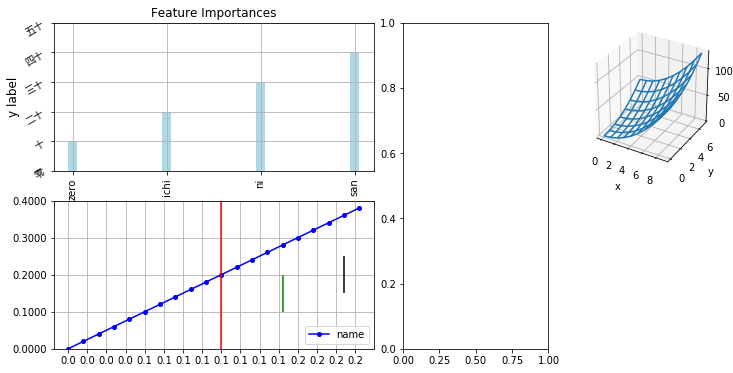

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import matplotlib.font_manager # 日本語
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

prop = matplotlib.font_manager.FontProperties(fname="C:/WIndows/Fonts/meiryo.ttc")
fig = plt.figure(figsize=[12,6])
G = gridspec.GridSpec(2,4)

### Figure 1
width=0.1
ax = plt.subplot(G[0,:2])
plt.grid(True)
plt.xlabel('x label', fontsize=12 )
plt.ylabel('y label', fontsize='large')
plt.title('Feature Importances')
plt.bar([0,1,2,3], [10,20,30,40], width=width, color='lightblue', align='center')
plt.xticks([0,1,2,3], ['zero','ichi','ni','san'], rotation=90)
# ax はticks と label を分けて設定しないといけない
ax.set_yticks( range(0,51,10) )
ax.set_yticklabels( [ u'零', u'十', u'二十',  u'三十',  u'四十', u'五十' ] ,fontproperties=prop, rotation=30)
#plt.xlim([-1, 4])
#plt.tight_layout()

### Figure 2
plt.subplot(G[1,:2])
plt.plot( np.arange(0, 0.2, 0.01), np.arange( 0, 0.4, 0.02), 'bo-', 
         markersize=4, label='name' )
plt.grid()
plt.ylim([0.0, 0.4])
plt.legend(loc='lower right')
# tick step
plt.xticks( np.arange(0, 0.2, 0.0125))
# virtical lines
plt.axvline( 0.1, color='r')
plt.vlines( [0.14,0.18], [0.1,0.15], [0.2, 0.25], colors=['g','k']) # ( x, ymin, ymax, ... )
ax = plt.gca()
# precision
ax.xaxis.set_major_formatter( FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter( FormatStrFormatter('%0.4f'))

### Figure 3
plt.subplot(G[:,2])

### Figure 4
ax = plt.subplot(G[0,3],projection='3d')
x = range(10)
y = range(8)
X,Y = np.meshgrid( x, y )
ax.plot_wireframe( X,Y, X**2 + Y**2 )
plt.xticks( x[::2] )
plt.xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### After the plot
plt.savefig('plot_sample.png', dpi=300)
plt.show()

## logスケールで表示が空になる場合

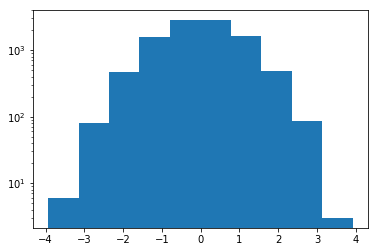

In [27]:
x = np.random.randn(10000)
plt.hist(x)
plt.yscale('log', nonposy='clip' )
#plt.yscale('log') # 表示が空になる
plt.show()

## 目盛は難しい
軸の見た目の調整はできればFormatterとLocatorで <br>
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9 <br>
https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html <br>
https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html <br>


In [19]:
x = np.arange(10)
y = x*x

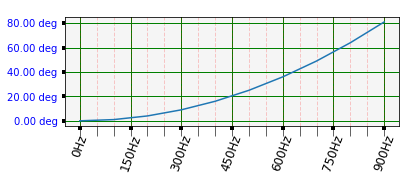

In [21]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x,y)
ax.grid(True)
ax.set_facecolor('whitesmoke')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter( ticker.FuncFormatter( lambda x,pos: "%dHz" % (x*100)) )
ax.tick_params(which='major', width=4)
ax.tick_params(which='minor', length=10)
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html
ax.tick_params( axis='x', labelrotation=70.0, labelsize='large')

ax.yaxis.set_major_formatter( ticker.FormatStrFormatter("%.2f deg") )
ax.tick_params( axis='y', labelcolor='blue' )
ax.grid( which ='major', color='g', linestyle='-', linewidth=1 )
ax.grid( which ='minor', c='r', ls='--', lw=1, alpha=0.2 )
plt.show()

## 対数表示はもっと難しい

### サンプルデータ作成

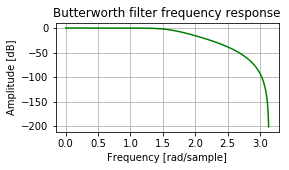

In [22]:
import scipy.signal as sg

b,a = sg.butter( 4, 0.5 ) # -> B/A
w, h = sg.freqz(b, a) # w[rad/sample]

fig = plt.figure(figsize=(4,2))
plt.plot(w, 20 * np.log10(abs(h)), 'g')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

### 対数表示を試みる

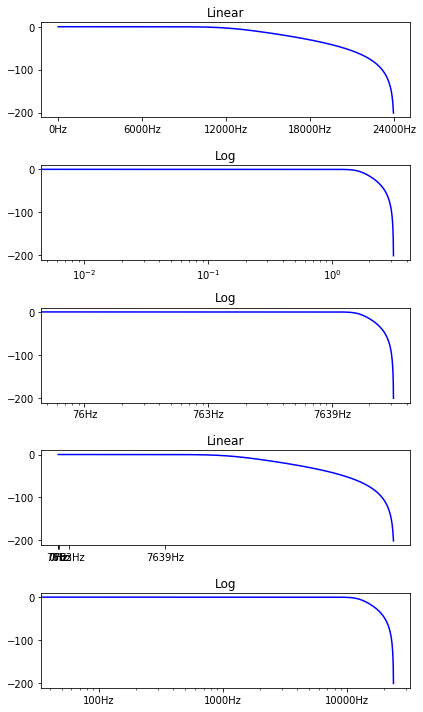

In [23]:
import matplotlib.ticker as ticker

sf = 48000

fig = plt.figure(figsize=(6,10))
ax = {}
nax = 5
for i in range(nax):
    ax[i+1] = fig.add_subplot(nax,1,i+1)
    ax[i+1].xaxis.set_major_formatter(
        ticker.FuncFormatter( lambda x,pos: "%dHz" % (x/np.pi*sf/2)) )

# 練習としてLinear表示
ax[1].plot(w, 20 * np.log10(abs(h)), 'b')
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(np.pi/4))
ax[1].set_title('Linear')

# 対数表示にするとFormatter がキャンセルされる
ax[2].plot(w, 20 * np.log10(abs(h)), 'b')
ax[2].set_xscale('log')
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(np.pi/4))
ax[2].set_title('Log')

# Formatter 再設定で復活したものの、データの [0.01, 0.1, 1.0]が対数表示の周期
ax[3].plot(w, 20 * np.log10(abs(h)), 'b')
ax[3].set_xscale('log') 
ax[3].xaxis.set_major_formatter(
        ticker.FuncFormatter( lambda x,pos: "%dHz" % (x/np.pi*sf/2)) )
ax[3].set_title('Log')

# LogLocator は目盛がLogScalep[0,01,0.1,1.0]の位置に打たれるだけで、軸はLinearのまま
ax[4].plot(w, 20 * np.log10(abs(h)), 'b')
ax[4].xaxis.set_major_formatter(
        ticker.FuncFormatter( lambda x,pos: "%dHz" % (x/np.pi*sf/2)) )
ax[4].xaxis.set_major_locator(ticker.LogLocator())
ax[4].set_title('Linear')

# 結局のところ、ｘ軸のデータをつくらないといけない
xfreq = w / np.pi * sf / 2
ax[5].plot(xfreq, 20 * np.log10(abs(h)), 'b')
ax[5].set_xscale('log') 
ax[5].xaxis.set_major_formatter(
        ticker.FuncFormatter( lambda x,pos: "%dHz" % x) )
ax[5].set_title('Log')
plt.tight_layout()
plt.show()

### 余談：Analog/Digitalフィルタの違い

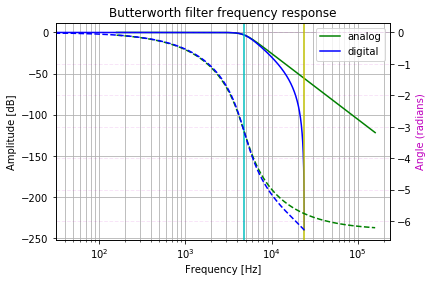

In [17]:
import scipy.signal as sg

sf = 48000
nf = sf/2 # nyquist freq
pbr = 0.2 # pass band ratio
cf = nf*pbr # cut-off freq
nipi = 2*np.pi # 2pi

b,a = sg.butter( 4, cf*nipi, analog=True) # H= B/A
w, h = sg.freqs(b, a) # w[rad/sec]

B, A = sg.butter(4, pbr) # H=B/A
W, H = sg.freqz(B, A) # W[rad/sample]

f = w / nipi
F = W / np.pi * nf

plt.plot(f, 20 * np.log10(abs(h)), 'g', label='analog')
plt.plot(F, 20 * np.log10(abs(H)), 'b', label='digital')
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid(which='both', axis='both')
plt.axvline(nf*pbr, color='c') # cutoff frequency
plt.axvline(nf, color='y') # nyquist frequency

ax1 = plt.gca()
ax2 = ax1.twinx() # 両軸グラフ, current axes は ax2 に
angles = np.unwrap(np.angle(h)) # unwrap(p, discont=3.141592653589793, axis=-1)
Angles = np.unwrap(np.angle(H)) 
plt.plot(f, angles, 'g--')
plt.plot(F, Angles, 'b--')
plt.ylabel('Angle (radians)', color='m')
plt.grid( which ='both', axis='y', color='m', linestyle='--', linewidth=1, alpha=0.1 )

#plt.axis('tight')
plt.show()


## Artist
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9 <br>


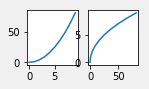

In [98]:
fig, ax = plt.subplots(1,2,figsize=(2,1)) # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成
fig.set_facecolor( '#f0f0f0' )
ax[0].plot(x,y)
ax[1].plot(y,x)
plt.show()

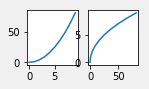

In [88]:
fig = plt.figure(figsize=(2,1)) # Figureオブジェクトを作成
fig.set_facecolor( '#f0f0f0' )
ax0 = fig.add_subplot(1,2,1) # figに属するAxesオブジェクトを作成
ax1 = fig.add_subplot(1,2,2) # figに属するAxesオブジェクトを作成
ax0.plot(x, y)
ax1.plot(y,x)
plt.show()

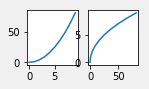

In [87]:
plt.subplot(121) # ax = plt.subplot(...) でAxesを捕捉できる
plt.plot(x,y) # l, = plt.plot(...)で Line2Dを捕捉できる
ax0 = plt.gca() # このタイミングで捕捉しないと後では無理？
plt.subplot(122)
plt.plot(y,x)
ax1 = plt.gca() # このタイミングで捕捉しないと後では無理？
fig = plt.gcf()  # fig を捕捉
fig.set_size_inches( 2,1 )
fig.set_facecolor( '#f0f0f0' )
plt.show()

In [6]:
%qtconsole


# Pandasのサンプル
参考<br>
http://sinhrks.hatenablog.com/entry/2014/11/12/233216

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'C1': [11, 21, 31],
                   'C2': [12, 22, 32],
                   'C3': [13, 23, 33],
                   'C4': [14, 24, 34]})
print df
print df [[True, False, True]]
ary = df.values.astype(np.int32)
idx = df.index.values.astype(np.int32)
print ary.dtype
print idx.dtype
print ary
print idx
print df.ix[:1,:1]  # including index=1 (loc behavior), NOT including column=1(iloc behavior)
print df.iloc[:1,:1] # use iloc for location index

   C1  C2  C3  C4
0  11  12  13  14
1  21  22  23  24
2  31  32  33  34
   C1  C2  C3  C4
0  11  12  13  14
2  31  32  33  34
int32
int32
[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
[0 1 2]
   C1
0  11
1  21
   C1
0  11


# ボタン等のつけ方
[参考](http://myenigma.hatenablog.com/entry/2015/08/30/223559)

# Waveファイルの扱い
[参考1](http://yukara-13.hatenablog.com/entry/2013/11/09/103848)<br>
[参考2](http://qiita.com/yu_tailsfox/items/86380a0d4d016e1634f1)<br>
[参考3](https://docs.scipy.org/doc/scipy-0.18.1/reference/io.html)

In [11]:
# -*- coding: utf-8 -*-
#from scipy.io.wavfile import read as siw
import scipy.io.wavfile as siw

#wavfile = "./test.wav"
wavfile = "../pydub/test/data/test1.wav"

fs, data = siw.read(wavfile)

print "Sampling rate :", fs

if (data.shape[1] == 2):
    left = data[:, 0]
    right = data[:, 1]

siw.write( "test_out.wav",  fs, data )

Sampling rate : 32000


# 連立方程式を解く
[参考１](http://myenigma.hatenablog.com/entry/2015/11/21/222755#連立方程式を解く)

# 改行なしで文字列を出力したい
[参考](http://www.lifewithpython.com/2013/12/python-print-without-.html)<br>
ひとつめは print string, を使う方法です。


In [12]:
print "hello",
print "hello",
print "hello"

hello hello hello


もうひとつは sys.stdout.write() を使う方法です。

In [13]:
import sys
sys.stdout.write("hello")
sys.stdout.write("hello")
sys.stdout.write("hello")

hellohellohello

Python3で改行を入れてほしくない場合は次のようにするとよいようです。

In [16]:
# case in Python 3
print("hello", end="")
print("hello", end="")

hellohello

ちなみに、Python2.6以降であれば、次の一文を宣言すると、 print 文を上書きする形でPython3の print 関数を使うことができるようになります。

In [15]:
## case in Python 2.6~
# from __future__ import print_function
# print("hello", end="")
# print("hello", end="")

hellohello

# global変数
関数の中でグローバル変数は参照できるが、そのままでは変更できない。
global 変数名 でグローバル宣言すると変更できる。
宣言せずに代入すると別インスタンスが生成される模様。


# Numpy配列

## 配列の基本

In [5]:
aa = [[1,2],[3,4]]
aanp = np.array(aa)
print ( aa[1], aanp[1] )
print ( aa[1][1], aanp[1][1] )
print ( type(aa[1][1]), type(aanp[1][1]) )


[3, 4] [3 4]
4 4
<class 'int'> <class 'numpy.int32'>


In [6]:
print ( aa[[0]] )

TypeError: list indices must be integers or slices, not list

In [8]:
print ( aanp[[0]] )
print ( aanp[[0,1]] )
print ( aanp[[0,1,1,0]][2] )

[[1 2]]
[[1 2]
 [3 4]]
[3 4]


In [9]:
print ( aanp[[True,True]] )

[[1 2]
 [3 4]]


In [5]:
print ( aanp[np.array([True,True])] )

[[1 2]
 [3 4]]


In [10]:
print ( aanp[np.array([True,True])][0] )

[1 2]


In [16]:
print ( aanp == 1 )
print ( aanp[aanp==1])

[[ True False]
 [False False]]
[1]


In [15]:
print ( aanp[0,0] )
print ( aanp[0][0] )
print ( aanp[0][0:1] )
print ( aanp[0:1][0:1] )
print ( type(aanp[aanp==1]) )

[1]
1
1
[1]
[[1 2]]
<class 'numpy.ndarray'>


In [9]:
print (aanp[aanp==1]).shape
print aanp[0][0].shape
print aa[0][0].shape

(1,)
()


AttributeError: 'int' object has no attribute 'shape'

In [13]:
bbnp =np.arange(0.0,0.9,0.1).reshape(3,3)
print (bbnp)
bbnp[ (bbnp>0.3) & (bbnp<0.8) ] = -1.0  # ()括弧を忘れずに
print (bbnp)

[[ 0.   0.1  0.2]
 [ 0.3  0.4  0.5]
 [ 0.6  0.7  0.8]]
[[ 0.   0.1  0.2]
 [-1.  -1.  -1. ]
 [-1.  -1.   0.8]]


## 行列全体のTrue/False

In [8]:
xx = np.array( range(24)).reshape(6,4)
print( np.any(xx>5) )
print( np.all(xx>5) )

True
False


## インデキシング

In [1]:
a = np.array(range(24)).reshape((2,3,4))
a.shape
print( a[:] )
print( "***\n", a[:,:,[0,2]] )
print( "先行次元は...でまとめて指定\n", a[...,0::2] )

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
('***\n', array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10]],

       [[12, 14],
        [16, 18],
        [20, 22]]]))
('\xe5\x85\x88\xe8\xa1\x8c\xe6\xac\xa1\xe5\x85\x83\xe3\x81\xaf...\xe3\x81\xa7\xe3\x81\xbe\xe3\x81\xa8\xe3\x82\x81\xe3\x81\xa6\xe6\x8c\x87\xe5\xae\x9a\n', array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10]],

       [[12, 14],
        [16, 18],
        [20, 22]]]))


In [3]:
pos1 = [ 0,0,0 ]
pos2 = ( 0,0,0 )
print( 'リストでのインデキシング', a[pos1])
print( 'タプルでのインデキシング', a[pos2])
print( 'リストをタプルに変えてインデキシング', a[tuple(pos1)])

('\xe3\x83\xaa\xe3\x82\xb9\xe3\x83\x88\xe3\x81\xa7\xe3\x81\xae\xe3\x82\xa4\xe3\x83\xb3\xe3\x83\x87\xe3\x82\xad\xe3\x82\xb7\xe3\x83\xb3\xe3\x82\xb0', array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]]))
('\xe3\x82\xbf\xe3\x83\x97\xe3\x83\xab\xe3\x81\xa7\xe3\x81\xae\xe3\x82\xa4\xe3\x83\xb3\xe3\x83\x87\xe3\x82\xad\xe3\x82\xb7\xe3\x83\xb3\xe3\x82\xb0', 0)
('\xe3\x83\xaa\xe3\x82\xb9\xe3\x83\x88\xe3\x82\x92\xe3\x82\xbf\xe3\x83\x97\xe3\x83\xab\xe3\x81\xab\xe5\xa4\x89\xe3\x81\x88\xe3\x81\xa6\xe3\x82\xa4\xe3\x83\xb3\xe3\x83\x87\xe3\x82\xad\xe3\x82\xb7\xe3\x83\xb3\xe3\x82\xb0', 0)


##  配列の諸元・比較

In [26]:
print ( aanp.size )
print ( aanp.ndim )
print ( aanp.shape )

4
2
(2, 2)


In [23]:
print ( aanp == aanp )
print ( np.array_equal( aanp, aanp ) )
print ( np.allclose( aanp, aanp+1, atol=1.1 ) )

[[ True  True]
 [ True  True]]
True
True


## 要素数が１の部分行列を生成すると次元数が減る対策

In [1]:
a = np.array( range(24)).reshape(2,3,4)
print( a.shape, 'original matrix')
z = np.zeros_like( a[:,1,:])
print( z.shape, 'sub matrix?')
z = np.zeros_like( a[:,1:2,:])
print( z.shape, 'ok')
z = np.zeros_like( a[:,[1],:])
print( z.shape, 'ok')

(2, 3, 4) original matrix
(2, 4) sub matrix?
(2, 1, 4) ok
(2, 1, 4) ok


## ゼロ行列の追加（ゼロパディング）

In [24]:
a = np.array( range(24)).reshape(2,3,4)
z = np.zeros_like( a[:,:,1:2])
acat = np.concatenate( (a, z), axis=2 )
print( a.shape, z.shape, acat.shape )
# もっと簡単に
acat2 = np.pad( a, ((0,0),(0,0),(0,1)), 'constant')
print( acat2.shape )
print( np.array_equal( acat,acat2 ) )
print( np.allclose( acat,acat2 ) )
# 任意次元の最終軸にパディング
acat3 = np.concatenate( (a, np.zeros(a.shape[:-1]+ (1,))), axis=-1 )
print( acat3.shape )
print( np.array_equal( acat2,acat3 ) )v


(2, 3, 4) (2, 3, 1) (2, 3, 5)
(2, 3, 5)
True
True
(2, 3, 5)
True


## reshape の -1

配列の総要素数が不明の場合は，大きさが不明な次元で -1 を指定すると適切な値が自動的に設定されます．

In [2]:
np.arange(6).reshape((2, -1))

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
np.arange(5).reshape((-1,1))

array([[0],
       [1],
       [2],
       [3],
       [4]])

## 次元の追加、削減

In [54]:
>>> x = np.array([[[0], [1], [2]]])
>>> x.shape
(1, 3, 1)
>>> xsqz = np.squeeze(x)
xsqz.shape
(3,)
>>> np.squeeze(x, axis=(2,)).shape
(1, 3)

(1, 3)

In [53]:
xsqz_ax1 = xsqz.reshape( [-1,xsqz.size,1] )
print xsqz_ax1.shape
xsqz_ax2 = xsqz_ax1[:,:,:,np.newaxis]
print xsqz_ax2.shape

(1, 3, 1)
(1, 3, 1, 1)


## sum で加算する方向( axis )について
加算されて１に縮退される軸を指定する


In [29]:
aa = np.array( [[1,2,3],[4,5,6]])
print "shape input", aa.shape
aa0 = np.sum( aa, axis=0 )
aa1 = np.sum( aa, axis=1 )
print "shape sum wrt axis=0", aa0.shape
print "shape sum wrt axis=1", aa1.shape

shape input (2, 3)
shape sum wrt axis=0 (3,)
shape sum wrt axis=1 (2,)


# 便利そうな関数

## numpy.bincount()
配列に含まれている０と１の数を数えるのに便利

In [9]:
a = [0, 1, 0, 1, 1, 0, 0]
np.bincount(a)

array([4, 3])

In [1]:
a = [0,5]
np.bincount(a) # 0 が 1つ、1から４まで０個、５が１つ

array([1, 0, 0, 0, 0, 1])

## numpy.argmax()

In [13]:
np.argmax( [1,2,10,3,4])

2

## テーブルルックアップ

In [17]:
table = np.array([5,4,3,2,1,0])
indata = np.array([[0,1,2],[3,4,5]])
table[indata]


array([[5, 4, 3],
       [2, 1, 0]])

## ravelと flattenの違い
ravel は変換前の行列も変更される('F'を指定した場合を除く?)のに対し、flattenは変換前の行列は影響を受けない。
Webでは次の表現が多数。「flattenは必ずコピーを返しますが、revelは必要なときだけコピーを返します(ですから特に大きな配列の場合後者がとても速いです)。」

In [15]:
aa = np.array( [[1,2],[3,4]])
print "befor ravel\n",aa
b0=aa.ravel(); bc=aa.ravel('C'); bf=aa.ravel('F')
b0[0] = 10;    bc[1] = 20;       bf[2] = 30
print "after ravel\n",aa
print b0, bc, bf

befor ravel
[[1 2]
 [3 4]]
after ravel
[[10 20]
 [ 3  4]]
[10 20  3  4] [10 20  3  4] [ 1  3 30  4]


In [6]:
aa = np.array( [[1,2],[3,4]])
b0=aa.flatten(); bc=aa.flatten('C'); bf=aa.flatten('F')
b0[0] = 10;    bc[1] = 20;       bf[2] = 30
print aa
print bf

[[1 2]
 [3 4]]
[ 1  3 30  4]


## ベクトルの差分(diff)、累積加算（cumsum）

In [4]:
aa = np.array(range(5))
aadiff= np.diff(aa)
aacumsum = np.cumsum(aa)
print( aadiff )
print( aacumsum )

[1 1 1 1]
[ 0  1  3  6 10]


## 入力データを離散化してインデックスを返す(digitize)

In [1]:
# -10 から 10 までを4区間に分けたい
bins = np.linspace( -10, 10, 4+1 )[1:-1].astype(np.int32) # binsの両端を落として3値[-5,0,5]にする
# テストデータ作成
xx = np.linspace( -10, 10, 21 ).astype(np.int32)
print('xx', xx)
print('bins',bins)
print( np.digitize( xx, bins) ) # 最大離散値のインデクス（一致の場合は超えたと解釈する）


xx [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
bins [-5  0  5]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3]


# Numpy配列のbroadcasting(次元の拡張)
Numpy が配列全てを変換して同じサイズを持つようにできる場合に行われる変換を broadcasting と呼びます。

In [12]:
x = np.arange(5)
y = np.arange(5)[:,np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

# バイナリファイルを一次元配列として全部読み込む

In [15]:
with open( 'foo.csv', 'rb') as fp:
    data = np.fromfile( fp, dtype=np.int32 )
data

array([221391921, 875311882])

## csv ファイルの読み書き

In [16]:
data = np.genfromtxt( "foo.csv", dtype=int, delimiter="," ) # loadtxtも可だが、欠落データをnanで埋めてくれる機能はない
print data.dtype
np.savetxt("bar.csv", data, delimiter=",", fmt="%d")

int32


## Numba でお気楽高速化

In [18]:
from numba import jit

def hoge(xx):
    wa = 0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wa = wa + xx[i,j]
    return wa

@jit
def hoge2(xx):
    wa = 0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wa = wa + xx[i,j]
    return wa

xx = np.random.rand(100,100)
%timeit hoge(xx)
xx = np.random.rand(100,100)
%timeit hoge2(xx)

xx = np.random.rand(100,100)
%timeit hoge(xx)
xx = np.random.rand(100,100)
%timeit hoge2(xx)

100 loops, best of 3: 5.12 ms per loop
The slowest run took 6625.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.6 µs per loop
100 loops, best of 3: 5.04 ms per loop
100000 loops, best of 3: 12.6 µs per loop


In [19]:
%timeit np.sum(xx)

The slowest run took 4.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.4 µs per loop


## 行列のスプリット
array_split は割り切れない場合は適当に配分してくれるが、split はエラーになる

In [18]:
a = np.array(range(10))
# splits tekito-ni
aa = np.array_split( a, 3 )
print type(aa)
print type(aa[0])
print aa
# causes error
np.split(a,3)

<type 'list'>
<type 'numpy.ndarray'>
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]


ValueError: array split does not result in an equal division

## 可変引数
* *一つがリストの可変引数。受け取った引数は指定した順序でタプルに格納されます
* *二つがキーワード可変長引数。受け取った引数はキーワードと値の対を要素とする辞書になる（順序は保存されない）

In [3]:
def fn ( *arg ):
    print (arg)
    
fn( 1,2,'dog')
fn( *(1,2,'dog'))
fn( (1,2,'dog') )


(1, 2, 'dog')
(1, 2, 'dog')
((1, 2, 'dog'),)


In [9]:
def fn( **arg):
    print arg

fn( a=1, b=2, c=2)
fn( **{'a':1,'b':2, 'c':3} )

{'a': 1, 'c': 2, 'b': 2}
{'a': 1, 'c': 3, 'b': 2}


## 漬物(Pickle)

In [26]:
import pickle
class uum():
    def __init__(self,val):
        self.val = val
    def print_val(self):
        print self.val
  
hoge = [uum(10), uum(20) ]
with open('sample.pickle', mode='wb') as f:
    pickle.dump( hoge, f)
with open('sample.pickle', mode='rb') as f:
    fuga = pickle.load(f)
    
print hoge
print fuga
fuga[1].print_val()

[<__main__.uum instance at 0x0000000009CEC188>, <__main__.uum instance at 0x0000000009CEC108>]
[<__main__.uum instance at 0x0000000009CEC408>, <__main__.uum instance at 0x0000000009CEC148>]
20


## あるオブジェクトが特定のクラスのインスタンスかチェックしたい

In [ ]:
## s = "hello"
print type(s) == str 
print isinstance( s, str )

# デバッグ Debug でばっぐ

## エラー発生個所からデバッグ開始

In [1]:
%pdb 

Automatic pdb calling has been turned ON


In [3]:
x=1
y=0
x/y

ZeroDivisionError: integer division or modulo by zero

> <ipython-input-3-a81a2919fa7c>(3)<module>()
      1 x=1
      2 y=0
----> 3 x/y

ipdb> y
0
ipdb> quit


## 任意の行からデバッグ開始

** break したいコードの直上に以下の一行を張り付ける **

In [ ]:
from IPython.core.debugger import Pdb; Pdb().set_trace() #  break したい所にこの行を張り付ける

## プロファイル(Profile)

In [ ]:
# Line Profile
# http://gouthamanbalaraman.com/blog/profiling-python-jupyter-notebooks.html
%load_ext line_profiler
%lprun -f func hunc(50000, 0.5) # 測定対象関数を -f で指定して、それを含む関数を呼ぶ

# その他

## リスト内包と条件文

In [7]:
x = range(10)
print( [i for i in x if i>5] )
print( [i if i > 5 else 0 for i in x ] )
# print( [i if i > 5 for i in x ] ) # Error


[6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 6, 7, 8, 9]


###  grep

In [27]:
animals = [ 'dog', 'cat', 'monkey', 'dog2', 'cat2', 'monke2' ]
key = 'dog'
[ item for item in animals if key in item]

['dog', 'dog2']

## 組み込み例外
https://docs.python.jp/3/library/exceptions.html

In [4]:
raise TypeError( "オブジェクトの型が正しくない")
raise ValueError("値が不適切")

TypeError: オブジェクトの型が正しくない

## リストのアンパック

In [11]:
a,b,c= ( 1,2,3 )
print(a)
a,b,c = [1,2,3]
print(b)
a = [1]
print(a)
a, = [1]
print(a)
a,b = [1,2,3]


1
2
[1]
1


ValueError: too many values to unpack (expected 2)

## 解析

In [40]:
a = np.array(range(24)).reshape([2,3,4])
print( '#data type: ',a.dtype )
print ('#id: ', id(a))
print( '#type: a', type(a))
print( '#type: a.transpose', type(a.transpose))
print( '#dir: ', dir(a))
print( [ item for item in dir(a) if 'fla' in item])

#data type:  int32
#id:  2521684580192
#type: a <class 'numpy.ndarray'>
#type: a.transpose <class 'builtin_function_or_method'>
#dir:  ['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__r